# Parcial Corte 2 Olarte Pardo Duvan Sebastian
### Caso de Negocio “YumFit”

In [420]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv"

--2025-05-01 04:36:22--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-05-01 04:36:23--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv.11’

clientes_seg

### Cargue de Librerias

In [421]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



df = pd.read_csv('clientes_segmentos (1).csv')
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32


In [422]:
df.shape

(15000, 14)

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_cliente           15000 non-null  object
 1   edad                 15000 non-null  int64 
 2   genero               15000 non-null  object
 3   ingresos             15000 non-null  int64 
 4   plataforma           15000 non-null  object
 5   interacciones        15000 non-null  int64 
 6   compras              15000 non-null  int64 
 7   promedio_ticket      15000 non-null  int64 
 8   total_gastado        15000 non-null  int64 
 9   fecha_primer_compra  15000 non-null  object
 10  fecha_ultima_compra  15000 non-null  object
 11  dias_desde_ultima    15000 non-null  int64 
 12  recomendaciones      15000 non-null  int64 
 13  costo_adquisicion    15000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.6+ MB


### Fase 1 – Análisis Exploratorio Avanzado (EDA)

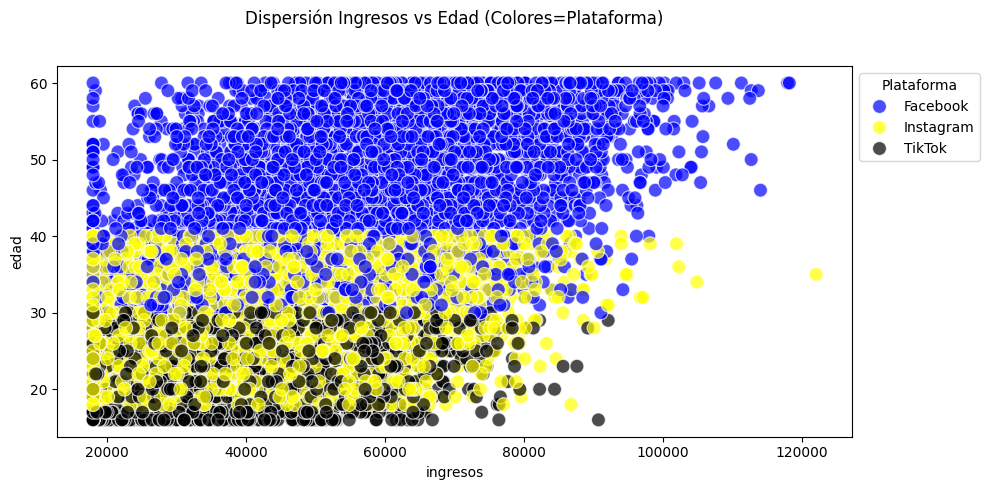

In [424]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df,
    x='ingresos',
    y='edad',
    hue='plataforma',
    palette=['blue', 'yellow', 'black'],
    s=100,
    alpha=0.7
)

plt.title('Dispersión Ingresos vs Edad (Colores=Plataforma)', pad=30)
plt.xlabel('ingresos')
plt.ylabel('edad')
plt.legend(title='Plataforma', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Rta:
1) Actualmente, se puede observar una clara diferencia generacional en el uso de las redes sociales. Las personas más jóvenes, especialmente hasta los 29 años, tienden a usar con mayor frecuencia aplicaciones como TikTok, siendo esta su red social preferida.

Instagram también es popular entre los jóvenes, pero su alcance se extiende a personas de hasta 40 años, lo que la convierte en una plataforma usada por distintos rangos de edad.

En cambio, Facebook ha perdido presencia entre los usuarios más jóvenes (de 0 a 29 años) y es más utilizada por personas adultas, entre los 30 y 60 años. Esto muestra cómo cada red social se asocia con diferentes grupos de edad, lo que es clave para diseñar estrategias de comunicación y marketing más efectivas.

2) Aunque los ingresos se comportan de forma similar en los distintos rangos de edad, se nota una tendencia a que aumenten conforme las personas son mayores. Por ejemplo, quienes tienen entre 40 y 60 años suelen ubicarse mayormente en el rango de ingresos entre 40 mil y 90 mil. En cambio, las personas más jóvenes se encuentran principalmente entre los 20 mil y 70 mil.

Este comportamiento muestra que la edad influye en los niveles de ingreso, lo cual es importante al momento de planear acciones o estrategias dirigidas a distintos grupos.

### P2. RFM preliminar

In [425]:
specific_date = pd.to_datetime('2024-04-01')
df['snapshot_date'] = specific_date

In [426]:
rfm = df.groupby('id_cliente').agg({
    'dias_desde_ultima': 'sum',
    'compras': 'sum',
    'total_gastado': 'sum'
})

rfm.rename(
    columns={
        'dias_desde_ultima': 'Recency',
        'compras': 'Frequency',
        'total_gastado': 'Monetary'
    },
    inplace=True
)

rfm.head()

,Recency,Frequency,Monetary
id_cliente,,,
C00000,97,2,228
C00001,24,1,88
C00002,27,3,69
C00003,44,1,47
C00004,53,1,102


In [427]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion,snapshot_date
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25,2024-04-01
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24,2024-04-01
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16,2024-04-01
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29,2024-04-01
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32,2024-04-01


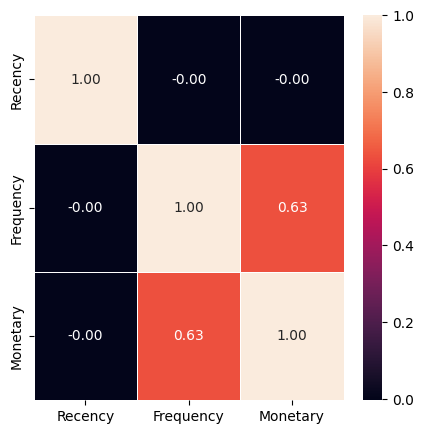

In [428]:
subset_correlation_matrix = rfm.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(
    subset_correlation_matrix,
    annot=True,
    fmt=".2f",
    linewidths=.5
)

plt.show()


In [429]:
df = pd.merge(df, rfm, on='id_cliente', how='left')
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion,snapshot_date,Recency,Frequency,Monetary
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25,2024-04-01,97,2,228
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24,2024-04-01,24,1,88
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16,2024-04-01,27,3,69
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29,2024-04-01,44,1,47
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32,2024-04-01,53,1,102


RTA:
Las variables de frecuencia y monetario resultan más efectivas para estimar el valor futuro del cliente, ya que, según el análisis realizado, muestran un mejor comportamiento en comparación con otras combinaciones de variables, debido a que presentan valores más altos. Además, un cliente que realiza compras con mayor frecuencia y cuyo gasto total es conocido, permite identificar con mayor precisión su valor futuro.

###Fase 2 – Métricas de Negocio (CAC, LTV, ROI)

In [430]:
Clientes_Plataforma = df.groupby('plataforma')['id_cliente'].count()

print(Clientes_Plataforma)

plataforma
Facebook     5209
Instagram    6049
TikTok       3742
Name: id_cliente, dtype: int64


In [431]:
CAC_Plataforma= df.groupby('plataforma')['costo_adquisicion'].sum()


print(CAC_Plataforma)


plataforma
Facebook     130298
Instagram    105762
TikTok        46628
Name: costo_adquisicion, dtype: int64


In [432]:
CAC_Promedio = CAC_Plataforma / Clientes_Plataforma

print (CAC_Promedio)

plataforma
Facebook     25.014014
Instagram    17.484212
TikTok       12.460716
dtype: float64


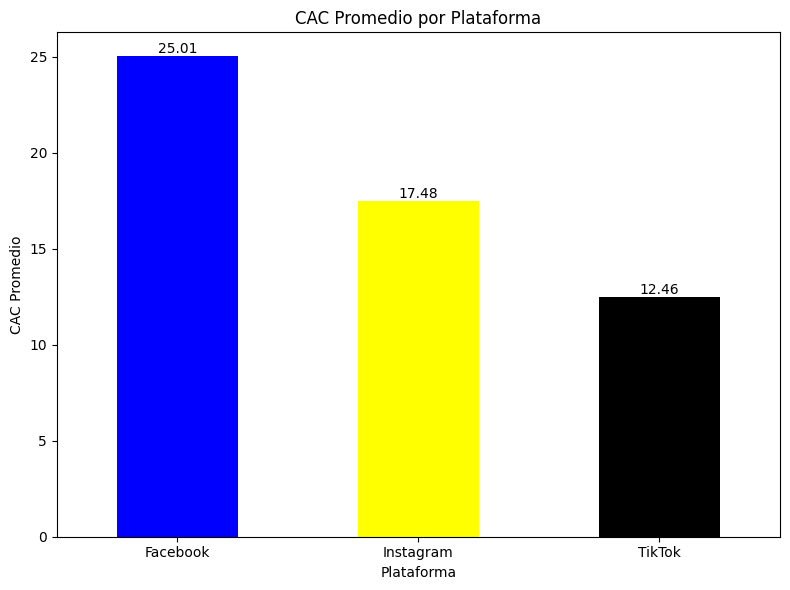

In [433]:
plt.figure(figsize=(8, 6))
CAC_Promedio.plot(kind='bar', color=['blue', 'yellow', 'black'])
plt.title('CAC Promedio por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('CAC Promedio')
plt.xticks(rotation=0)

for i, v in enumerate(CAC_Promedio):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')


plt.tight_layout()
plt.show()


In [434]:
df.head(
)

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion,snapshot_date,Recency,Frequency,Monetary
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25,2024-04-01,97,2,228
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24,2024-04-01,24,1,88
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16,2024-04-01,27,3,69
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29,2024-04-01,44,1,47
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32,2024-04-01,53,1,102


In [435]:
def calcular_tasa_retencion(dias_desde_ultima):
    if dias_desde_ultima < 90:
        return 0.80
    elif 90 <= dias_desde_ultima <= 180:
        return 0.60
    else:
        return 0.30


df['tasa_retencion'] = df['dias_desde_ultima'].apply(calcular_tasa_retencion)

In [436]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion,snapshot_date,Recency,Frequency,Monetary,tasa_retencion
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25,2024-04-01,97,2,228,0.6
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24,2024-04-01,24,1,88,0.8
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16,2024-04-01,27,3,69,0.8
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29,2024-04-01,44,1,47,0.8
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32,2024-04-01,53,1,102,0.8


In [437]:


df['fecha_ultima_compra'] = pd.to_datetime(df['fecha_ultima_compra'])
df['dias_desde_ultima'] = (pd.Timestamp('2025-04-01') - df['fecha_ultima_compra']).dt.days
df['frecuencia_mensual'] = df['compras'] / (df['dias_desde_ultima']/30 + 1)

In [438]:
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,fecha_ultima_compra,dias_desde_ultima,recomendaciones,costo_adquisicion,snapshot_date,Recency,Frequency,Monetary,tasa_retencion,frecuencia_mensual
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,2024-12-25,97,0,25,2024-04-01,97,2,228,0.6,0.472441
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,2025-03-08,24,0,24,2024-04-01,24,1,88,0.8,0.555556
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,2025-03-05,27,1,16,2024-04-01,27,3,69,0.8,1.578947
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,2025-02-16,44,0,29,2024-04-01,44,1,47,0.8,0.405405
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,2025-02-07,53,0,32,2024-04-01,53,1,102,0.8,0.361446


In [439]:
df['LTV'] = (df['total_gastado'] / df['compras'] )* df['frecuencia_mensual']

In [440]:
df['Frecuencia_anual'] = df['frecuencia_mensual'] * 12
df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,...,recomendaciones,costo_adquisicion,snapshot_date,Recency,Frequency,Monetary,tasa_retencion,frecuencia_mensual,LTV,Frecuencia_anual
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,...,0,25,2024-04-01,97,2,228,0.6,0.472441,53.858268,5.669291
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,...,0,24,2024-04-01,24,1,88,0.8,0.555556,48.888889,6.666667
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,...,1,16,2024-04-01,27,3,69,0.8,1.578947,36.315789,18.947368
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,...,0,29,2024-04-01,44,1,47,0.8,0.405405,19.054054,4.864865
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,...,0,32,2024-04-01,53,1,102,0.8,0.361446,36.867470,4.337349


In [441]:
df['LTV12MESES'] = (df['promedio_ticket'] * df['Frecuencia_anual'] )* df['tasa_retencion']

df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,...,costo_adquisicion,snapshot_date,Recency,Frequency,Monetary,tasa_retencion,frecuencia_mensual,LTV,Frecuencia_anual,LTV12MESES
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,...,25,2024-04-01,97,2,228,0.6,0.472441,53.858268,5.669291,387.779528
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,...,24,2024-04-01,24,1,88,0.8,0.555556,48.888889,6.666667,469.333333
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,...,16,2024-04-01,27,3,69,0.8,1.578947,36.315789,18.947368,348.631579
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,...,29,2024-04-01,44,1,47,0.8,0.405405,19.054054,4.864865,182.918919
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,...,32,2024-04-01,53,1,102,0.8,0.361446,36.867470,4.337349,353.927711


El percentil 90 de LTV es: 681.4979016958898


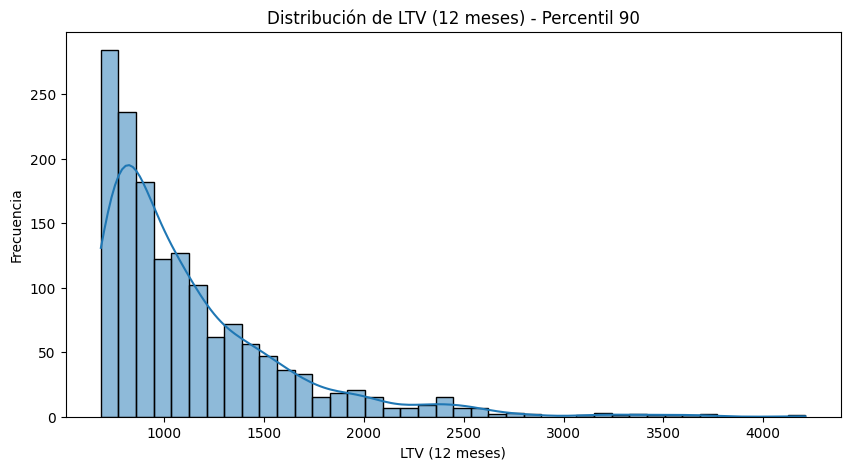

In [442]:
percentil_90_ltv = np.percentile(df['LTV12MESES'], 90)

print(f"El percentil 90 de LTV es: {percentil_90_ltv}")

clientes_percentil_90 = df[df['LTV12MESES'] >= percentil_90_ltv]

plt.figure(figsize=(10, 5))
sns.histplot(clientes_percentil_90['LTV12MESES'], kde=True)
plt.title('Distribución de LTV (12 meses) - Percentil 90')
plt.xlabel('LTV (12 meses)')
plt.ylabel('Frecuencia')
plt.show()


In [443]:
df['Margen'] = (df['LTV12MESES'] - df['costo_adquisicion'] )

df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,...,snapshot_date,Recency,Frequency,Monetary,tasa_retencion,frecuencia_mensual,LTV,Frecuencia_anual,LTV12MESES,Margen
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,...,2024-04-01,97,2,228,0.6,0.472441,53.858268,5.669291,387.779528,362.779528
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,...,2024-04-01,24,1,88,0.8,0.555556,48.888889,6.666667,469.333333,445.333333
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,...,2024-04-01,27,3,69,0.8,1.578947,36.315789,18.947368,348.631579,332.631579
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,...,2024-04-01,44,1,47,0.8,0.405405,19.054054,4.864865,182.918919,153.918919
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,...,2024-04-01,53,1,102,0.8,0.361446,36.867470,4.337349,353.927711,321.927711


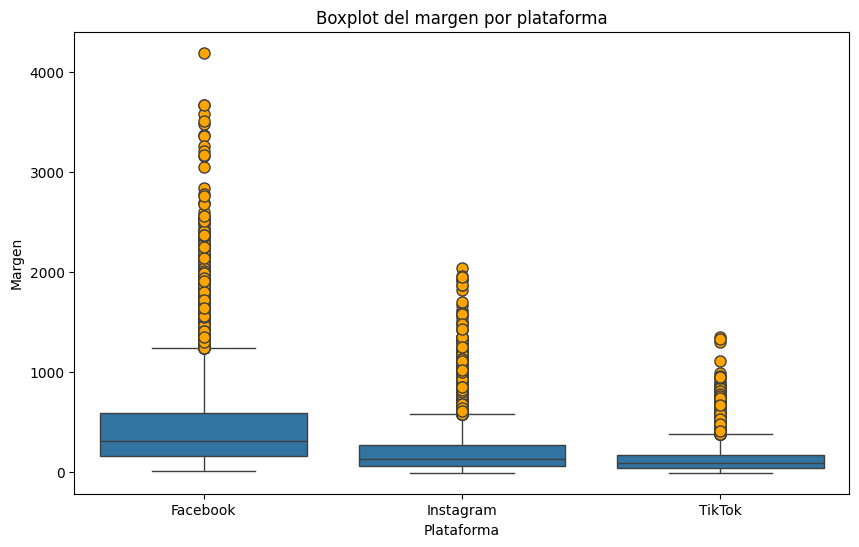

In [444]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='plataforma', y='Margen', data=df, showfliers=True,
            flierprops={"marker": "o", "markerfacecolor": "orange", "markersize": 8})
plt.title('Boxplot del margen por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Margen')
plt.show()


RTA:
Facebook representa la plataforma con mayor potencial de rentabilidad. Esto se evidencia en su margen mediano, que es visiblemente más alto en comparación con Instagram y TikTok, con múltiples casos que superan los 1,000 y llegan hasta los 4,000 en  margen. Esta gran concentración de márgenes elevados sugiere la existencia de segmentos de clientes altamente rentables.

### Fase 3 – Segmentación y Modelado

In [445]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary', 'recomendaciones']])

In [446]:
clusterfijo = 3
kmeans = KMeans(n_clusters=clusterfijo, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [447]:
df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary', 'recomendaciones']].mean()

,Recency,Frequency,Monetary,recomendaciones
Cluster,,,,
0,138.547766,1.863918,78.447423,0.484364
1,92.583725,3.993243,241.051410,0.542303
2,51.291205,1.827389,77.061288,0.502597


In [448]:
cluster_names = {
    0: "Recency Alto,Gasto Bajo",
    1: "Recency Medio, Gasto Alto",
    2: "Recency Bajo, Gasto Bajo"
}
df['cluster_names'] = df['Cluster'].map(cluster_names)

df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,...,Frequency,Monetary,tasa_retencion,frecuencia_mensual,LTV,Frecuencia_anual,LTV12MESES,Margen,Cluster,cluster_names
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,...,2,228,0.6,0.472441,53.858268,5.669291,387.779528,362.779528,1,"Recency Medio, Gasto Alto"
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,...,1,88,0.8,0.555556,48.888889,6.666667,469.333333,445.333333,2,"Recency Bajo, Gasto Bajo"
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,...,3,69,0.8,1.578947,36.315789,18.947368,348.631579,332.631579,2,"Recency Bajo, Gasto Bajo"
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,...,1,47,0.8,0.405405,19.054054,4.864865,182.918919,153.918919,2,"Recency Bajo, Gasto Bajo"
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,...,1,102,0.8,0.361446,36.867470,4.337349,353.927711,321.927711,2,"Recency Bajo, Gasto Bajo"


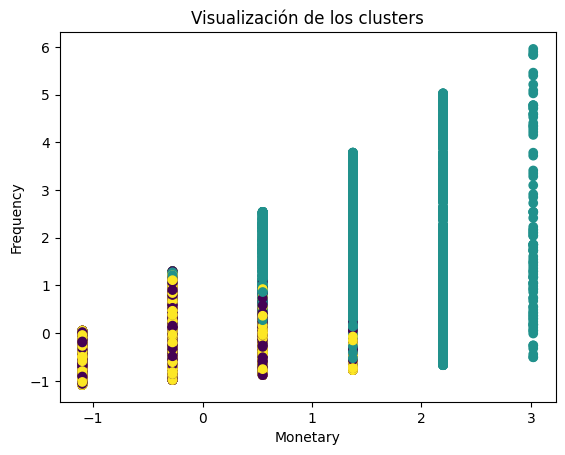

In [449]:
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=df['Cluster'], cmap='viridis')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Visualización de los clusters')
plt.show()

In [450]:
percentil_75_margen = np.percentile(df['Margen'], 75)
df['high_margin'] = np.where(df['Margen'] >= percentil_75_margen, 1, 0)

df.head()

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,...,Monetary,tasa_retencion,frecuencia_mensual,LTV,Frecuencia_anual,LTV12MESES,Margen,Cluster,cluster_names,high_margin
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,...,228,0.6,0.472441,53.858268,5.669291,387.779528,362.779528,1,"Recency Medio, Gasto Alto",1
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,...,88,0.8,0.555556,48.888889,6.666667,469.333333,445.333333,2,"Recency Bajo, Gasto Bajo",1
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,...,69,0.8,1.578947,36.315789,18.947368,348.631579,332.631579,2,"Recency Bajo, Gasto Bajo",0
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,...,47,0.8,0.405405,19.054054,4.864865,182.918919,153.918919,2,"Recency Bajo, Gasto Bajo",0
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,...,102,0.8,0.361446,36.867470,4.337349,353.927711,321.927711,2,"Recency Bajo, Gasto Bajo",0


### Fase 4 – Decisión Estratégica

In [451]:
Inversion = 10000

total_Mergen = df['Margen'].sum()

roiCASO1 = ((total_Mergen - Inversion) / Inversion) * 100

print(f"El ROI para una inversión de {Inversion} USD es: {roiCASO1:.2f}%")


El ROI para una inversión de 10000 USD es: 41728.20%


In [452]:
cluster_1_return = df[df['Cluster'] == 0]['Margen'].sum()
cluster_2_return = df[df['Cluster'] == 1]['Margen'].sum()

total_return = cluster_1_return + cluster_2_return

roiCASO2 = (total_return / Inversion ) * 100

print(f"Total Return for Cluster 1: ${cluster_1_return:.2f}")
print(f"Total Return for Cluster 2: ${cluster_2_return:.2f}")
print(f"Total Return: ${total_return:.2f}")
print(f"ROI: {roiCASO2:.2f}%")

Total Return for Cluster 1: $487816.24
Total Return for Cluster 2: $2047869.32
Total Return: $2535685.56
ROI: 25356.86%


In [453]:
margen_por_cluster = df.groupby('Cluster')['Margen'].mean()
print(margen_por_cluster)

Cluster
0     83.817224
1    601.606732
2    285.168687
Name: Margen, dtype: float64


In [454]:
proporcion_inversion = margen_por_cluster / margen_por_cluster.sum()
proporcion_inversion

,Margen
Cluster,
0,0.086357
1,0.619834
2,0.293809


In [455]:
inversion_cluster_1 = Inversion * 0.10
inversion_cluster_2 = Inversion * 0.50
inversion_cluster_3 = Inversion * 0.40

margen_cluster_1 = df[df['Cluster'] == 0]['Margen'].sum()
margen_cluster_2 = df[df['Cluster'] == 1]['Margen'].sum()
margen_cluster_3 = df[df['Cluster'] == 2]['Margen'].sum()

roi_cluster_1 = (margen_cluster_1 / inversion_cluster_1) * 100
roi_cluster_2 = (margen_cluster_2 / inversion_cluster_2) * 100
roi_cluster_3 = (margen_cluster_3 / inversion_cluster_3) * 100


print(f"ROI for Cluster 1: {roi_cluster_1:.2f}%")
print(f"ROI for Cluster 2: {roi_cluster_2:.2f}%")
print(f"ROI for Cluster 3: {roi_cluster_3:.2f}%")

ROI_promedio= (roi_cluster_1 + roi_cluster_2 + roi_cluster_3) /3

print(f"ROI_promedio: {ROI_promedio:.2f}%")

ROI for Cluster 1: 48781.62%
ROI for Cluster 2: 40957.39%
ROI for Cluster 3: 41178.36%
ROI_promedio: 43639.12%


            ROI    Estrategia
0  41728.198943        Caso 1
1  25356.855578        Caso 2
2  43639.122978  ROI_promedio


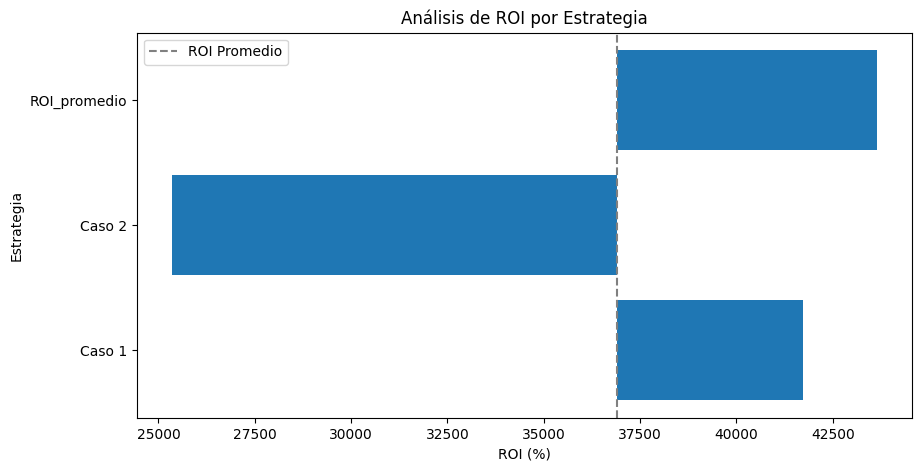

In [456]:
import pandas as pd
import matplotlib.pyplot as plt

roi_caso1 = roiCASO1
roi_caso2 = roiCASO2
ROI_promedio


roi_data = {
    'ROI': [roi_caso1, roi_caso2, ROI_promedio ],
    'Estrategia': ['Caso 1', 'Caso 2', 'ROI_promedio']
}
roi_df = pd.DataFrame(roi_data)

print(roi_df)

roi_values = roi_df['ROI']
strategies = roi_df['Estrategia']

fig, ax = plt.subplots(figsize=(10, 5))

baseline_roi = roi_df['ROI'].mean()

ax.barh(strategies, roi_values - baseline_roi, left=baseline_roi)

ax.axvline(baseline_roi, color='gray', linestyle='--', label='ROI Promedio')
ax.set_xlabel('ROI (%)')
ax.set_ylabel('Estrategia')
ax.set_title('Análisis de ROI por Estrategia')
ax.legend()
plt.show()


In [459]:
df.groupby('cluster_names')[['LTV12MESES', 'costo_adquisicion', 'Margen']].mean()

,LTV12MESES,costo_adquisicion,Margen
cluster_names,,,
"Recency Alto,Gasto Bajo",102.015849,18.198625,83.817224
"Recency Bajo, Gasto Bajo",303.410031,18.241343,285.168687
"Recency Medio, Gasto Alto",622.584993,20.978261,601.606732


In [457]:
df.head(

)

,id_cliente,edad,genero,ingresos,plataforma,interacciones,compras,promedio_ticket,total_gastado,fecha_primer_compra,...,Monetary,tasa_retencion,frecuencia_mensual,LTV,Frecuencia_anual,LTV12MESES,Margen,Cluster,cluster_names,high_margin
0,C00000,36,F,41869,Facebook,18,2,114,228,2023-06-02,...,228,0.6,0.472441,53.858268,5.669291,387.779528,362.779528,1,"Recency Medio, Gasto Alto",1
1,C00001,53,F,57074,Facebook,16,1,88,88,2024-02-13,...,88,0.8,0.555556,48.888889,6.666667,469.333333,445.333333,2,"Recency Bajo, Gasto Bajo",1
2,C00002,36,F,47859,Instagram,29,3,23,69,2023-07-27,...,69,0.8,1.578947,36.315789,18.947368,348.631579,332.631579,2,"Recency Bajo, Gasto Bajo",0
3,C00003,55,F,53656,Facebook,17,1,47,47,2024-01-08,...,47,0.8,0.405405,19.054054,4.864865,182.918919,153.918919,2,"Recency Bajo, Gasto Bajo",0
4,C00004,47,F,46759,Facebook,15,1,102,102,2024-02-12,...,102,0.8,0.361446,36.867470,4.337349,353.927711,321.927711,2,"Recency Bajo, Gasto Bajo",0
